In [2]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt 

In [20]:
model = keras.models.load_model('./models/sonnenschein')
test = pd.read_csv("./python_datasets/test_data.csv")[["age", "sex", "payment_type", "was_canceled"]]

In [21]:
#test = test[test["was_canceled"] == 1].reset_index(drop=True)
test

,age,sex,payment_type,was_canceled
0,50,0,1,0
1,54,0,0,0
2,70,0,0,1
3,49,0,0,0
4,75,1,1,0
...,...,...,...,...
193,79,1,0,1
194,28,0,1,0
195,47,0,1,1
196,64,1,1,1


In [22]:
age_test = np.asarray(test["age"])
sex_test = np.asarray(test["sex"].astype("int32"))
payment_type_test = np.asarray(test["payment_type"].astype("int32"))
X_Test = np.stack((age_test, sex_test, payment_type_test), axis=-1)
y_test = (test['was_canceled']>0.1)


In [23]:
X_Test[0]

array([50,  0,  1], dtype=int64)

In [24]:
threshold_range = np.arange(0, 1, 0.01)
precision_list = []
predicitions = model.predict(X_Test)


threshold_list = []
real_label_list = []
for threshold in threshold_range:
    threshold_inner_list = []
    real_label_inner_list = []
    for i, pred in enumerate(predicitions):
        if (pred > threshold):
            threshold_inner_list.append(True)
            real_label_inner_list.append(y_test[i])
        else:
            threshold_inner_list.append(False)
            real_label_inner_list.append(y_test[i])
            
            
       
    threshold_list.append(threshold_inner_list)
    real_label_list.append(real_label_inner_list)

    
    
y_test = list(y_test)
precision_list = []
for i, predicted_label in enumerate(threshold_list):
    precision = precision_score(list(real_label_list[i]), list(predicted_label), average="micro")
    
    precision_list.append(precision)

7/7 [==============================] - 0s 1ms/step


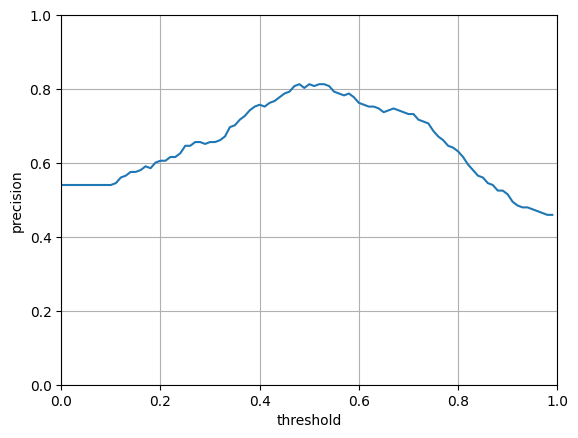

In [25]:
plt.plot(threshold_range, precision_list)
plt.ylabel('precision')
plt.xlabel('threshold')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()

In [26]:
test = pd.read_csv("./test_data.csv")[["age", "sex", "payment_type", "was_canceled"]]
age_test = np.asarray(test["age"])
sex_test = np.asarray(test["sex"].astype("int32"))
payment_type_test = np.asarray(test["payment_type"].astype("int32"))
X_Test = np.stack((age_test, sex_test, payment_type_test), axis=-1)
y_test = (test['was_canceled']>0.1)


7/7 [==============================] - 0s 1ms/step


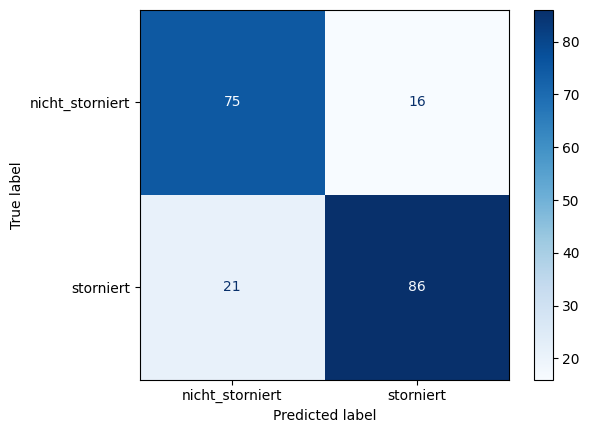

In [27]:



predicition = model.predict(X_Test)
y_predict = (predicition>0.5)


threshold_predict = []
threshold_real = []
for i, predict in enumerate(predicition):
    if predict > 0.70:
        threshold_predict.append(True)
        threshold_real.append(y_test[i])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['nicht_storniert','storniert'])

disp.plot(cmap=plt.cm.Blues)

plt.show()

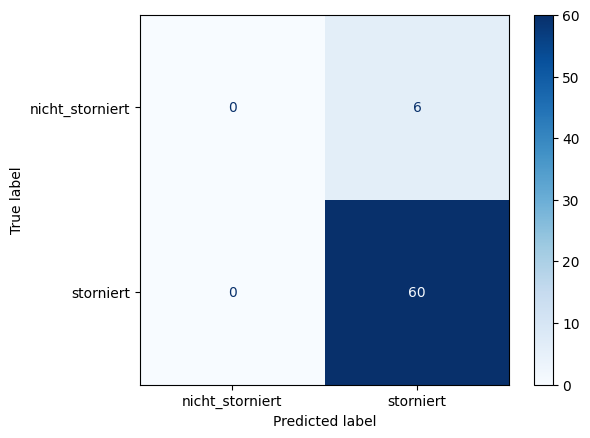

In [28]:
cm = confusion_matrix(threshold_real, threshold_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['nicht_storniert','storniert'])

disp.plot(cmap=plt.cm.Blues)

plt.show()

In [29]:
threshold_range = np.arange(0, 1, 0.01)

predicition = model.predict(X_Test)
y_predict = (predicition>0.5)

threshold_predicted_list = []
real_list = []
for threshold in threshold_range:
    pred = []
    true = []
    for i, predict in enumerate(predicition):
        if predict > threshold:
            pred.append(True)
            true.append(y_test[i])
    threshold_predicted_list.append(pred)
    real_list.append(true)

7/7 [==============================] - 0s 1000us/step


In [30]:


result_list = []

for pred_list, true_list in zip(threshold_predicted_list, real_list):
    same = 0
    different = 0
    for pred, true in zip(pred_list, true_list):

        if pred == true:
            same += 1
        else:
            different += 1
    result_list.append([same, different])

In [31]:
same_list = []
difference_list = []
for result in result_list:
    same_list.append(result[0])
    difference_list.append(result[1])
    

In [32]:
ratio_list = []
for same, different in zip(same_list, difference_list):
    if same == 0 or different == 0:
        ratio_list.append(0)
        continue
    ratio_list.append(round((same/different), 4))

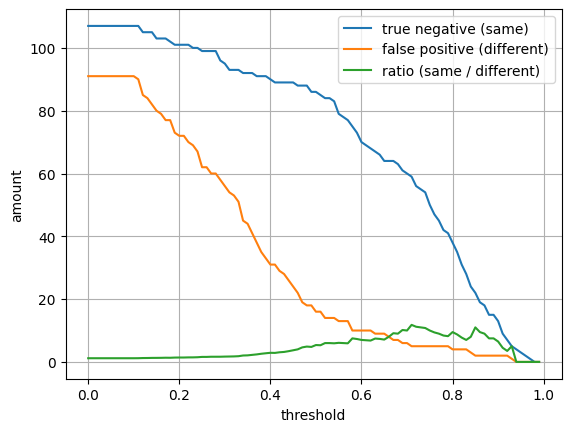

In [33]:
plt.plot(threshold_range, same_list, label="true negative (same)")
plt.plot(threshold_range, difference_list, label="false positive (different)")
plt.plot(threshold_range, ratio_list, label="ratio (same / different)")
plt.ylabel('amount')
plt.xlabel('threshold')
plt.grid()
plt.legend(loc="upper right")